# EDA MODEL

---



The project aims to develop an early disease detection system for patients with medical conditions using machine learning techniques applied to datasets sourced from Kaggle.com.

The first step of this project is to perform exploratory data analysis (EDA) to gain insights into the data. Next, we will apply data preprocessing techniques such as handling missing values, outliers, and scaling. Finally, we will create new features from the existing data to improve the predictive power of our models.

The aims is to achieve early detection of diseases in patients with medical conditions using data from Kaggle.com datasets. Also this will be availabe in the next repository:

This dataset was modified only to use a population sector between the ages of 15 and 75 years, therefore the results may vary if you wish to use the same dataset in other programs.

https://github.com/CarlosLeonel89/IA-ML-PROJECT-Detection-Disease

---



# DIABETES

Dataset source: [Kaggle Diabetes Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

##About this Dataset:
The **Diabetes prediction dataset** is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.

This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.


##Features

*   **Gender**: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

*   **Age**: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

*   **Hypertension**: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated.

*   **Heart Disease**: Heart disease is another medical condition that is associated with an increased risk of developing diabetes.

*   **Smoking History**: Smoking history is also considered as a risk factor on Diabetes. It represents smoking history of the patient.

*   **BMI(Body Mass Index)**: BMI (Body Mass Index) is a measure of body fat based on weight and height. Patients with higher BMI are known for having more risk of suffering from diabetes.

*   **HbA1c Level**: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.

*   **Blood Glucose Level**: Blood glucose level refers to the amount of glucose in the bloodstream at a given time.

*   **Diabetes**: Represents the patient if he/she has diabetes or not. 0 is negative, 1 is positive.


---



# CODE & GRAPHS

## Import libraries


In [42]:
!pip install xgboost==1.7.6

In [43]:
from pathlib import Path
import tarfile
import urllib.request
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns

from zlib import crc32
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, PrecisionRecallDisplay
from sklearn.pipeline import Pipeline

Importing & downloading information from the datasets:

In [44]:
def load_diabetes_data():
    tarball_path = Path("datasets/diabetes_prediction_dataset_15-75.csv")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = 'https://raw.githubusercontent.com/CarlosLeonel89/IA-ML-PROJECT-Detection-Disease/main/datasets/diabetes/diabetes_prediction_dataset_15-75.csv'
        urllib.request.urlretrieve(url, tarball_path)
    return pd.read_csv(tarball_path)

diabetes = load_diabetes_data()

In [45]:
df = pd.read_csv('datasets/diabetes_prediction_dataset_15-75.csv')

Code to read the information of the datasets.

Print all the information of the dataset:

In [46]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,54,0,0,No Info,27.32,6.6,80,0
1,Male,28,0,0,never,27.32,5.7,158,0
2,Female,36,0,0,current,23.45,5.0,155,0
3,Female,20,0,0,never,27.32,6.6,85,0
4,Female,44,0,0,never,19.31,6.5,200,1


In [47]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,77402.000000,77402.000000,77402.000000,77402.000000,77402.000000,77402.000000,77402.000000
mean,44.297693,0.076019,0.033345,28.639308,5.532438,138.350068,0.088602
std,16.388358,0.265030,0.179538,6.216365,1.073837,40.972084,0.284171
min,15.000000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,30.000000,0.000000,0.000000,25.390000,4.800000,100.000000,0.000000
50%,45.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,58.000000,0.000000,0.000000,30.790000,6.200000,159.000000,0.000000
max,75.000000,1.000000,1.000000,95.220000,9.000000,300.000000,1.000000


The `.described` method returns statistical information of the dataframe or series data (in fact, this method returns a dataframe). This information includes the number of samples, the mean value, the standard deviation, the minimum value, the maximum value, the median and the values corresponding to the 25% and 75% percentiles.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77402 entries, 0 to 77401
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               77402 non-null  object 
 1   age                  77402 non-null  int64  
 2   hypertension         77402 non-null  int64  
 3   heart_disease        77402 non-null  int64  
 4   smoking_history      77402 non-null  object 
 5   bmi                  77402 non-null  float64
 6   HbA1c_level          77402 non-null  float64
 7   blood_glucose_level  77402 non-null  int64  
 8   diabetes             77402 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 5.3+ MB


The .`info` method displays a summary of a dataframe, including information about the type of row and column indexes, non-null values and memory used.

In [49]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

The last method analyze and return `True` for missing components and `False` for non-missing cells. However, when the dimension of a dataset is large, it could be difficult to figure out the existence of missing values.

In [50]:
#Line of code to drop duplicate data
df = df.drop_duplicates()

In [51]:
df.diabetes.value_counts(normalize = True).mul(100)

0    90.828905
1     9.171095
Name: diabetes, dtype: float64


This parameter of the `value_counts()` function normalizes the counts, dividing each count by the total number of values in the column. This converts the counts into proportions or percentages. It returns a Series where the unique values are the index labels, and the corresponding values are the percentages of each value in the column.

In [52]:
pd.crosstab(df.gender, df.diabetes, margins = True)

diabetes,0,1,All
gender,,,
Female,41371,3531,44902
Male,26476,3321,29797
Other,14,0,14
All,67861,6852,74713


By combining all these parts, the code calculates a cross-tabulation table between the "gender" and "diabetes" columns in the DataFrame `df`. The resulting table shows the frequency count of each unique combination of values between these two variables.

# Graphs

In [53]:
con_cols = [x for x in df.dtypes.index if df.dtypes[x] != 'object']

The code creates a list `con_cols` that contains the names of all the columns in the DataFrame df whose data type is not `object` (i.e., the list will include columns with numerical or non-textual data). This list can be useful for further processing or analysis of the numerical columns in the DataFrame.

In [54]:
zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0]
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]

print(zero_per)
print(one_per)

90.82890527752868
9.171094722471324


 The code calculates the percentage of occurrences for each unique value (0 and 1) in the `diabetes` column of the DataFrame `df` and prints the resulting percentages. It can be used to understand the distribution of the `diabetes` variable in the dataset.



---



The next code is jut to create a graph that will show a bar chart with two bars, representing the count of occurrences for each class ('0' and '1') of the `diabetes` variable in the DataFrame `df`. The percentage of each class will be displayed as text labels above their respective bars.

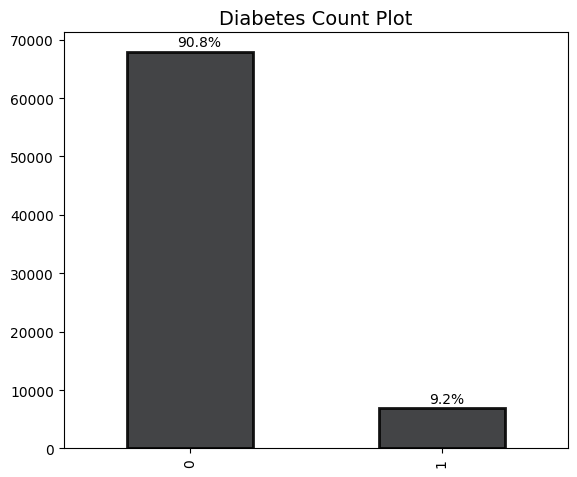

In [55]:
fig = plt.figure(figsize = (6,5))

zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0] #getting percentage of 0 class
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]  #getting percentage of 1 class

ax = df['diabetes'].value_counts().plot(kind = 'bar', color = '#2E2F32', edgecolor = 'k', linewidth = 2, alpha = 0.9)

ax.text(ax.patches[0].get_x() + 0.2 ,ax.patches[0].get_height() + 1000, f"{round(zero_per, 1)}%", fontsize = 10 ) #writing zero percentage to plot
ax.text(ax.patches[1].get_x() + 0.2 ,ax.patches[1].get_height() + 1000, f"{round(one_per, 1)}%", fontsize = 10 )  #writing one percentage to plot

plt.title("Diabetes Count Plot")


plt.tight_layout()
plt.show()

As you can see the percentages that we got in the chart is corresponding to the results of the last code:

```
zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0]
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]

print(zero_per)
print(one_per)

```

In this case we got a 90.8% of negatives results & 9.8% of positives results.




The next code sets up a directory for saving high-resolution PNG images, defines a function to save figures with customizable parameters, sets default font sizes for plots, creates and saves a histogram plot of the "diabetes" object, and displays the plot on the screen.

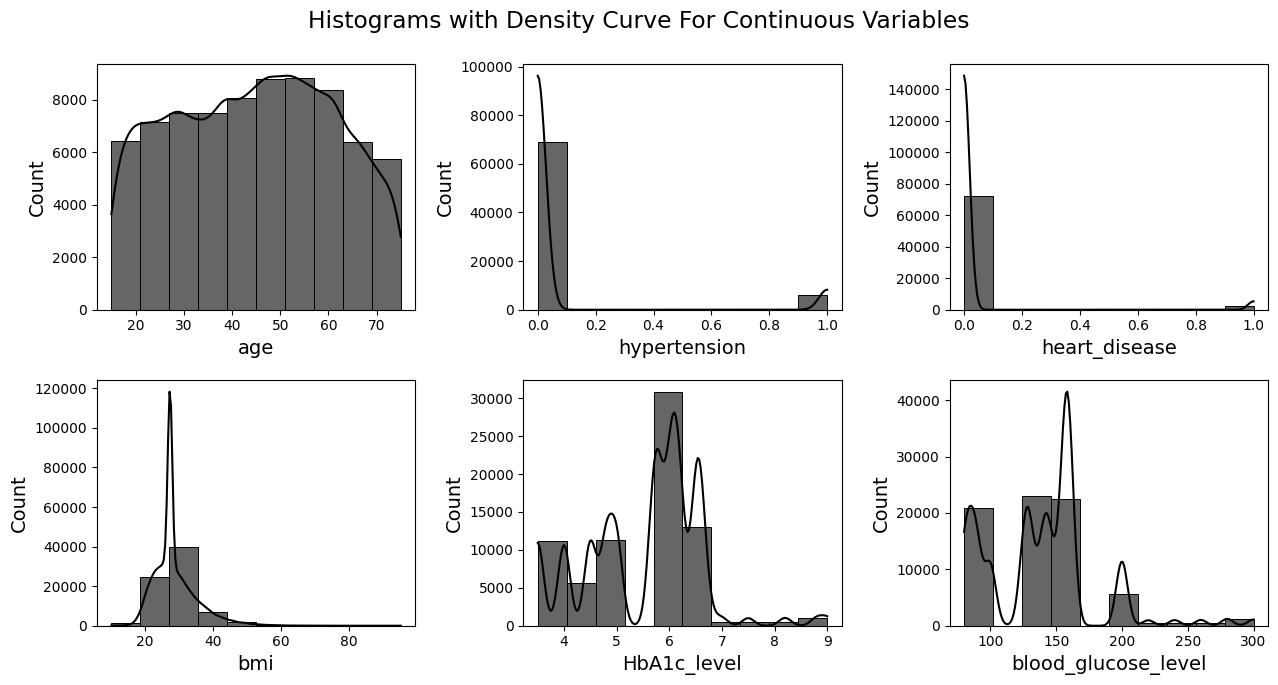

In [56]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 7))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[con_cols[i]], bins=10, kde=True, ax=ax, color="black", edgecolor='k', linewidth=0.7, alpha=0.6)

fig.suptitle("Histograms with Density Curve For Continuous Variables")
plt.tight_layout()
save_fig("continuous_variable_histograms")  # Saving the figure as high-res PNG
plt.show()


The last code creates a 2x3 grid of subplots using `plt.subplots()` with a figure size of (13, 7). It then plots histograms with density curves for continuous variables present in the DataFrame `df`. The loop iterates through each subplot in the flattened `axes` array and plots a histogram for the corresponding column in `df`.

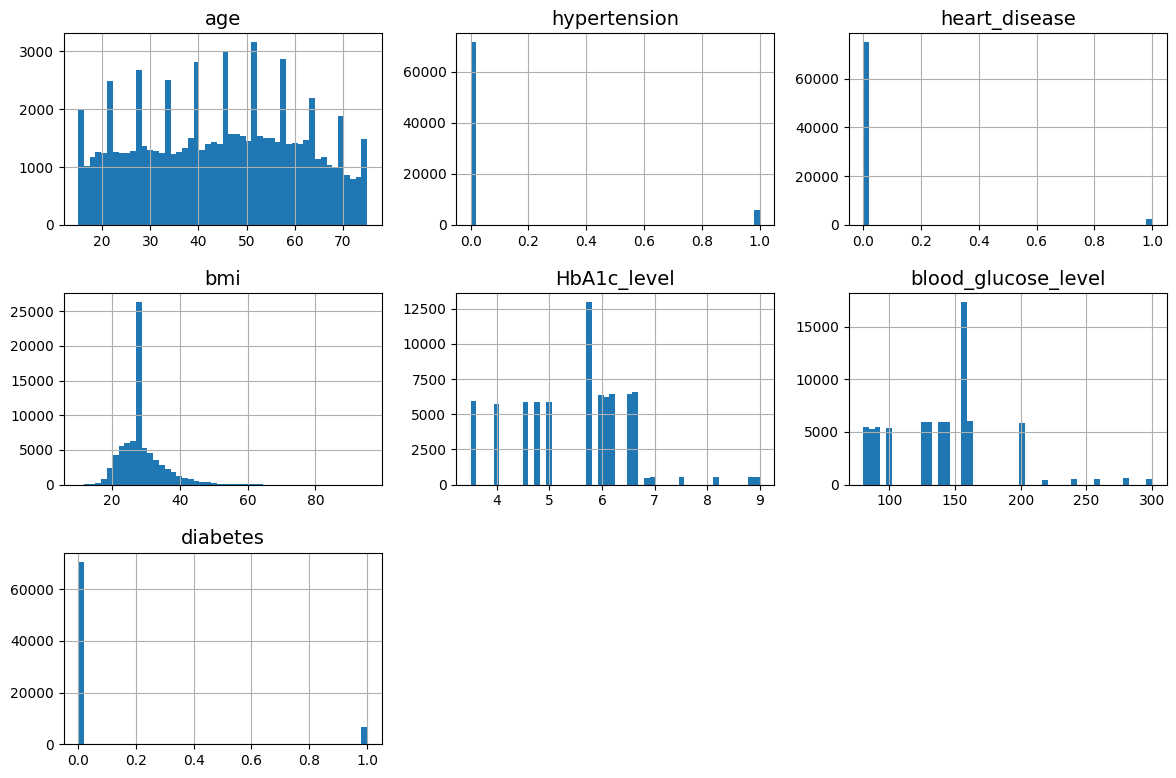

In [57]:
 # extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

diabetes.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

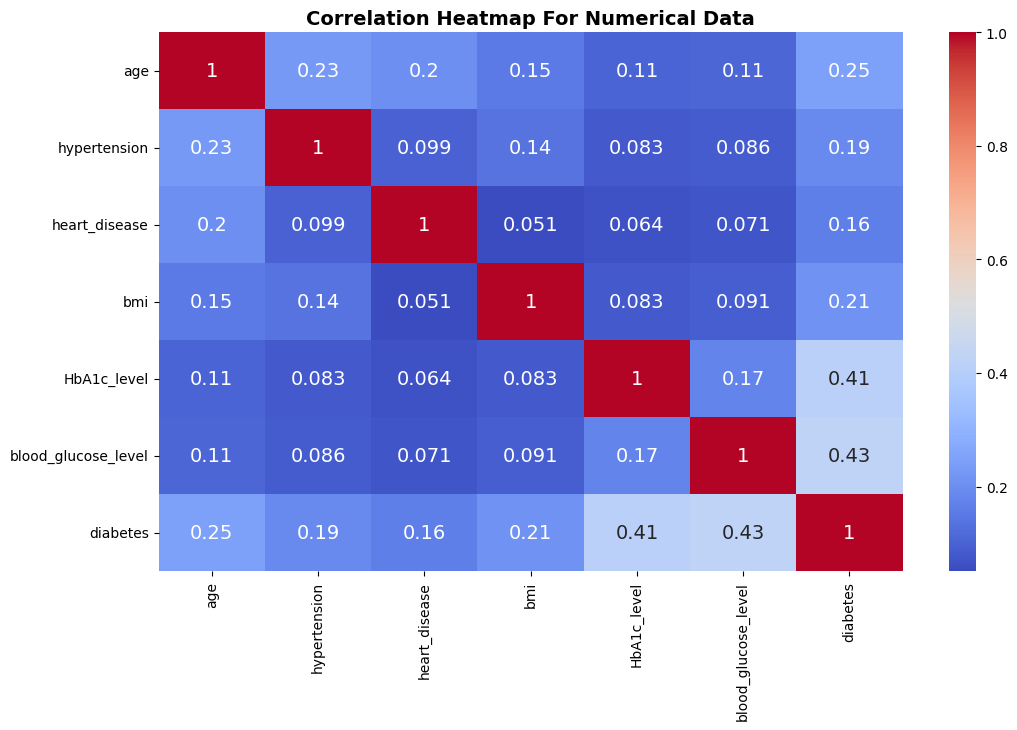

In [58]:
plt.figure(figsize = (12,7))
sns.heatmap(df[con_cols].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap For Numerical Data", fontsize = '14', fontweight= 'bold')
plt.show()

This code generates a heatmap visualization to show the correlation between numerical columns in the DataFrame `df` using Seaborn's heatmap function. The plot displays the correlation coefficients as colors, making it easier to identify patterns and relationships between the numerical variables.

# Create a Test Set

In [59]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

The `shuffle_and_split_data` function takes a dataset and a test ratio, shuffles the dataset's indices, and splits the dataset into training and test sets based on the specified ratio. It returns the subsets of the original data as separate DataFrames representing the **training set** and the **test set**.

In [60]:
train_set, test_set = shuffle_and_split_data(diabetes, 0.2)
len(train_set)

61922

This code splits the `diabetes` dataset into a training set and a test set using the `shuffle_and_split_data` function with a test ratio of 0.2. It then determines the number of rows in the resulting **training set** and returns this length.

In [61]:
len(test_set)

15480

By evaluating `len(test_set)`, the code determines the number of rows (observations) in the `test_set` DataFrame and returns this length as the output.

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [62]:
np.random.seed(42)

Sadly, this won't guarantee that this notebook will output exactly the same results always, since there are other possible sources of variation. The most important is the fact that algorithms get tweaked over time when libraries evolve. So please tolerate some minor differences: hopefully, most of the outputs should be the same, or at least in the right ballpark.

The splitting is based on a 20% test size, and a random seed of 42 is set for consistent shuffling and splitting if the code is run multiple times. The resulting subsets are assigned to the train_set and test_set variables, respectively.

In [63]:
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

These functions provide a mechanism to split a dataset into a training set and a test set based on an identifier column. The is_id_in_test_set function calculates a CRC hash value for each identifier and compares it to a threshold based on the test_ratio to determine membership in the test set. The split_data_with_id_hash function applies this logic to the identifier column of the dataset, returning separate DataFrames for the training and test sets.

In [64]:
diabetes_with_id = diabetes.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(diabetes_with_id, 0.2, "index")

print("Training set:")
print(train_set)

print("\nTest set:")
print(test_set)

Training set:
       index  gender  age  hypertension  heart_disease smoking_history    bmi  \
0          0  Female   54             0              0         No Info  27.32   
1          1    Male   28             0              0           never  27.32   
3          3  Female   20             0              0           never  27.32   
4          4  Female   44             0              0           never  19.31   
6          6  Female   32             0              0           never  27.32   
...      ...     ...  ...           ...            ...             ...    ...   
77396  77396  Female   26             0              0           never  34.34   
77398  77398  Female   36             0              0         No Info  24.60   
77399  77399    Male   66             0              0          former  27.83   
77400  77400  Female   24             0              0           never  35.42   
77401  77401  Female   57             0              0         current  22.43   

       HbA1c_

This code prepares the `diabetes` dataset for splitting by adding an identifier column. It then calls the `split_data_with_id_hash` function to split the dataset into a training set and a test set using the added identifier column. The resulting subsets are assigned to `train_set` and `test_set` variables, respectively.

In [65]:
diabetes_with_id["id"] = diabetes["age"] * 1000 + diabetes["diabetes"]
#Se establecen un "x" y "Y" como parametros de valores int, en este caso seleccione edad y Diabetes (Positivo - Negativo)
#Seleccione estos dos parametros debido a que en principio este modelo se rige por las edades, y no por el geenro.
train_set, test_set = split_data_with_id_hash(diabetes_with_id, 0.2, "id")


This code creates a new column named "id" in the `diabetes_with_id` DataFrame. This column is derived from the existing columns "age" and "diabetes" in the original `diabetes` DataFrame. The values in the "id" column are calculated by multiplying the values in the "age" column by 1000 and then adding the corresponding values in the "diabetes" column. This calculation creates a unique identifier for each row in the dataset.

In [66]:
train_set, test_set = train_test_split(diabetes, test_size=0.2, random_state=42)

print("Training set:")
print(train_set)

print("\nTest set:")
print(test_set)

Training set:
       gender  age  hypertension  heart_disease smoking_history    bmi  \
12932  Female   34             0              0         No Info  20.50   
5567   Female   73             0              0            ever  27.73   
29015  Female   42             0              0           never  33.58   
22803    Male   15             0              0         No Info  29.77   
24426  Female   28             0              0           never  23.43   
...       ...  ...           ...            ...             ...    ...   
6265   Female   51             1              0            ever  35.63   
54886    Male   42             0              0           never  22.64   
76820  Female   47             0              0         No Info  27.32   
860      Male   23             0              0           never  27.32   
15795    Male   59             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
12932          4.8                   85      

In [67]:
len(test_set)

15481

Categorical Data And Visualizations - Training Model

---



From we saw when from EDA there is a Class Imbalance

class 0 around 90.8%
class 1 around 9.2%

In [68]:
X = df.drop('diabetes', axis = 1 )
y = df.diabetes

This code separates the features (independent variables) from the target variable (dependent variable) in a DataFrame df. The features are assigned to `X`, while the target variable is assigned to `Y`. This is a common step in machine learning tasks to prepare the data for model training or analysis.

In [69]:
encoded = pd.get_dummies(X[['smoking_history', 'gender']], drop_first = True)

This code performs one-hot encoding on the selected categorical columns '**smoking_history**' and '**gender**' from the DataFrame. The resulting encoded DataFrame, which includes the binary representation of the categorical variables, is assigned to the variable `encoded`.

In [70]:
X = pd.concat([ X.drop(['gender', 'smoking_history'],axis =1),   encoded  ], axis = 1)

In [71]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

The random seed of 42 is set for consistent shuffling and splitting if the code is run multiple times. The resulting subsets are assigned to the train_set and test_set variables, respectively.

In [72]:
model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

 This code creates an instance of the XGBoost classifier (`XGBClassifier`) with a specified random seed. It then fits the classifier to the training data (`X_train` and `y_train`), training the model to learn patterns and make predictions based on the provided features and target variables.

In [73]:
def report_model(model):
    y_train_repo = model.predict(X_train)
    y_test_repo = model.predict(X_test)
    print(f"the accuracy on train set {accuracy_score(y_train, y_train_repo)}")
    print(f"the accuracy on test set {accuracy_score(y_test, y_test_repo)}")
    print()
    print(classification_report(y_test , y_test_repo))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_repo)).plot()
    plt.show()

The `report_model` function takes a trained model as input and evaluates its performance by calculating and displaying various metrics such as accuracy, classification report, and confusion matrix. This function provides an overview of the model's performance on the training and test sets, along with detailed metrics for each class in the test set.

the accuracy on train set 0.9768446815426681
the accuracy on test set 0.9660926206835014

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20376
           1       0.95      0.66      0.78      2038

    accuracy                           0.97     22414
   macro avg       0.96      0.83      0.88     22414
weighted avg       0.97      0.97      0.96     22414



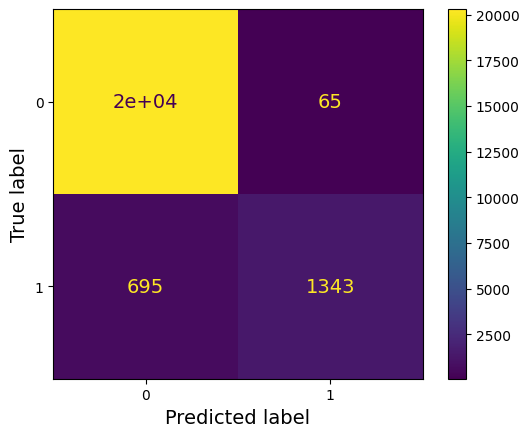

In [74]:
 report_model(model = model)

In [75]:
cv = StratifiedKFold(n_splits=10)
# evaluate model
scores = cross_val_score(XGBClassifier(), X_train , y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores.mean())

0.9696169728536288


The `n_splits=10` parameter indicates that the data will be divided into 10 folds for cross-validation.

This method provides a more reliable estimate of the classifier's performance compared to using a single train-test split, as it uses multiple different train-test splits and averages the results

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Perform predictions
y_pred = model.predict(X_test)

# Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " , accuracy*100 ,'%')

Accuracy:  95.07004550727224 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Finally, the code prints the accuracy of the model as a percentage by multiplying the accuracy value with 100 and appending a percentage symbol '%'. This accuracy represents how well the model performed on the test data in terms of correct predictions compared to the true labels.